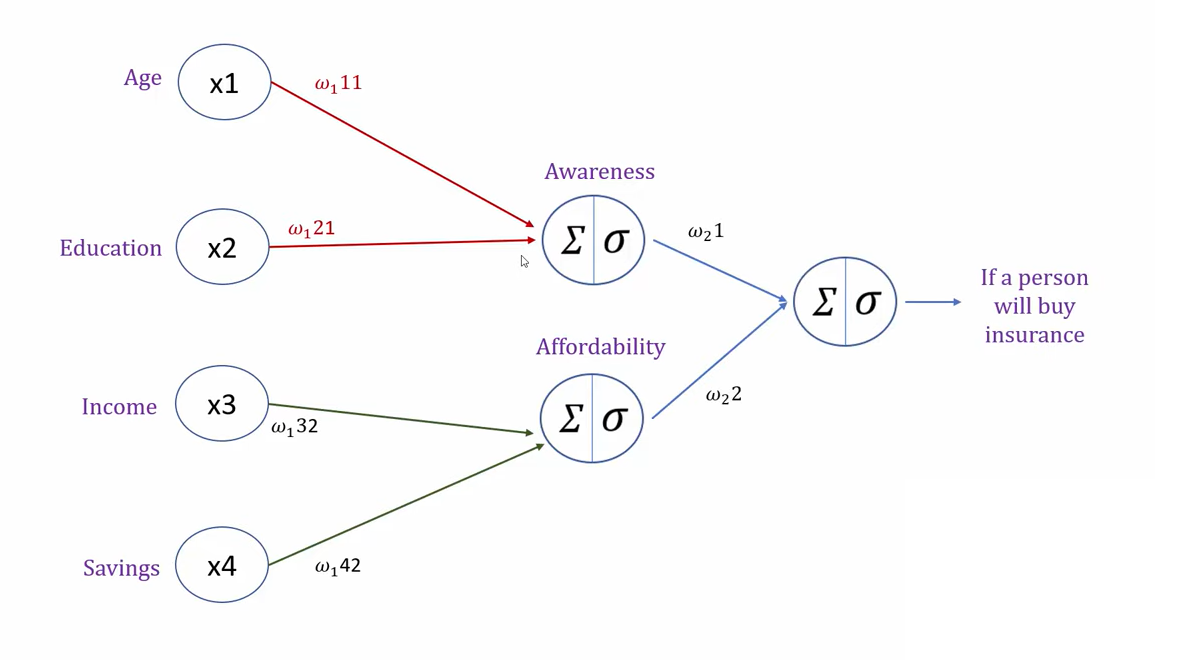

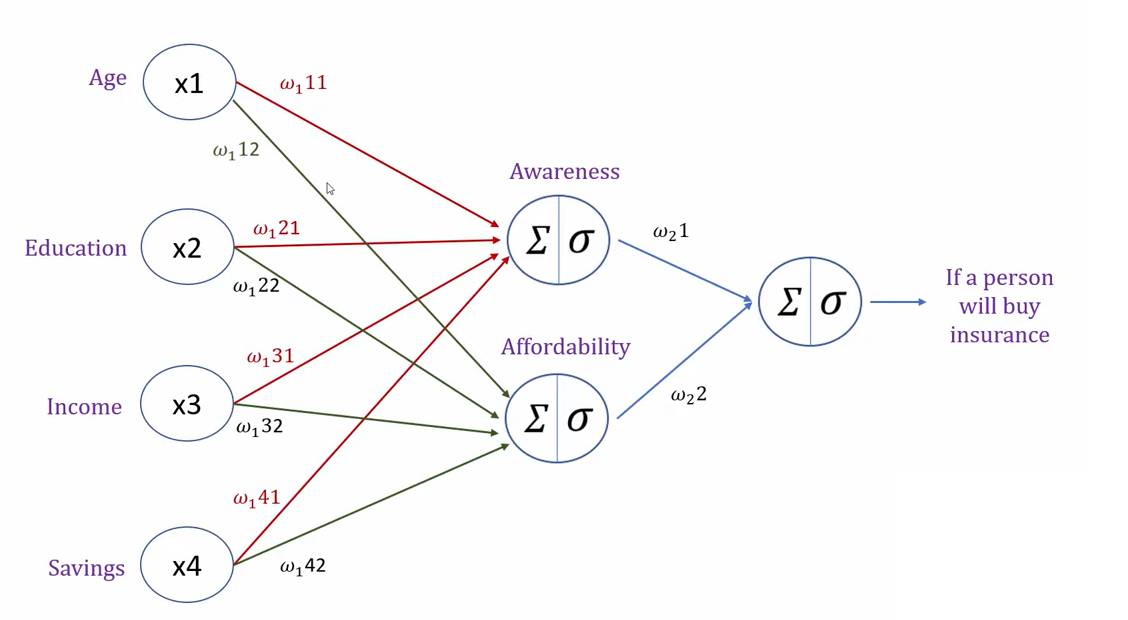

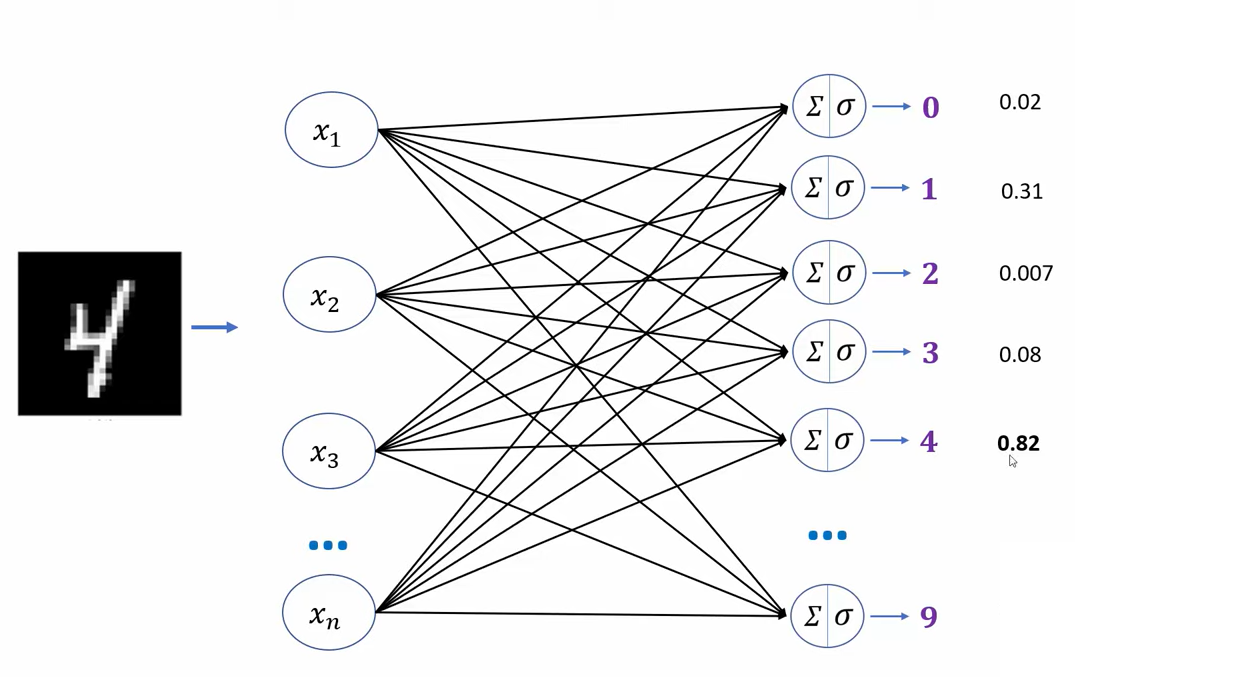

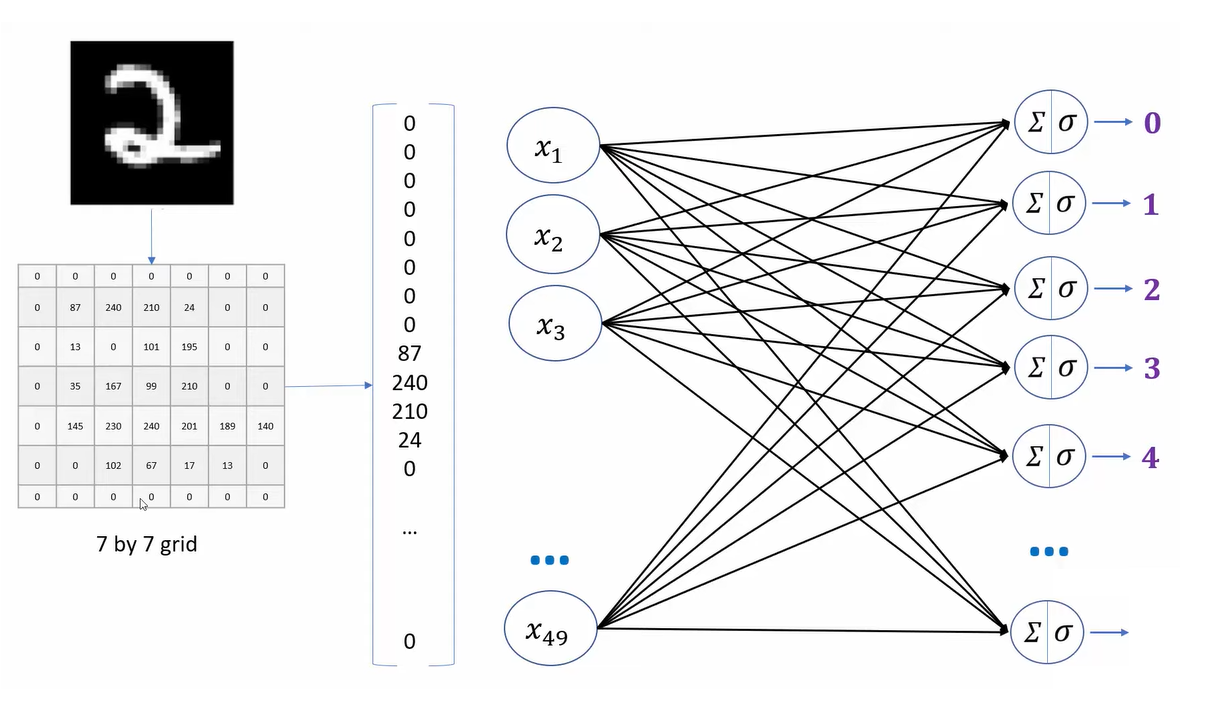

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from tensorflow import keras

2023-08-02 18:56:40.491348: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
len(X_train)

60000

In [4]:
len(X_test)

10000

In [5]:
X_train[0].shape

(28, 28)

In [6]:
X_train.shape

(60000, 28, 28)

In [7]:
#X_train[0]

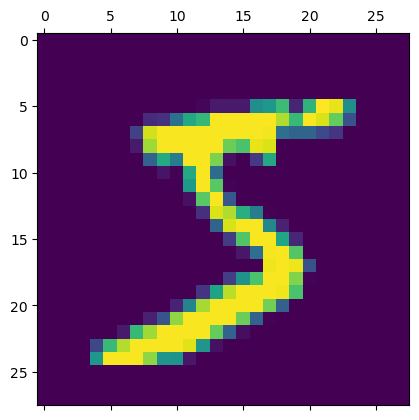

In [8]:
plt.matshow(X_train[0])

In [9]:
y_train[0]

5

In [10]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [11]:
X_train.shape[1]

28

In [12]:
 #(60000, 28, 28) to (60000, 784) NOT Scaling
X_train_flattened = X_train.reshape(len(X_train), X_train.shape[1] * X_train.shape[2]) 
X_test_flattened = X_test.reshape(len(X_test), X_test.shape[1] * X_test.shape[2]) 

In [13]:
print(X_train.shape)
print(X_train_flattened.shape)

(60000, 28, 28)
(60000, 784)


In [14]:
#X_train[1]

In [15]:
#X_train_flattened[1]

In [16]:
X_train_flattened[10][12]

0

In [17]:
X_train_flattened.shape[1]

784

In [18]:
# Simple NN
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(X_train_flattened.shape[1],), activation = 'sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 9.8199 - accuracy: 0.8403
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 6.1031 - accuracy: 0.8776
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 5.6927 - accuracy: 0.8820
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 5.4430 - accuracy: 0.8852
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 5.3176 - accuracy: 0.8852


In [19]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 5.6442 - accuracy: 0.8879


[5.6441802978515625, 0.8878999948501587]

In [20]:
def train_and_evaluate(function, X_train, X_test):
    model = keras.Sequential([
        keras.layers.Dense(10, input_shape = (784, ), activation = function)
    ])
    
    # Compile the model
    model.compile(
        optimizer = 'adam',
        loss = 'sparse_categorical_crossentropy',
        metrics = ['accuracy']
    )
    
    # Train the model
    model.fit(X_train, y_train, epochs = 1) # just keep epoch 1 to make execution faster
    
    # Evaluate the model
    loss, accuracy = model.evaluate(X_test, y_test)
    print(f"{function} completed.")
    return accuracy

In [21]:
# Train and evaluate the model with different activation functions
activation_functions = ['sigmoid', 'ReLU', 'tanh', 'linear', 'softmax']
accuracies = [train_and_evaluate(func, X_train_flattened, X_test_flattened) for func in activation_functions]

# print the accuracies per activation function
for func, acc in zip(activation_functions, accuracies):
    print(f"{func} - Test accuracy: {acc}")

313/313 [==============================] - 1s 1ms/step - loss: 6.0967 - accuracy: 0.8830
sigmoid completed.
313/313 [==============================] - 1s 2ms/step - loss: 2.3203 - accuracy: 0.0987
ReLU completed.
313/313 [==============================] - 1s 2ms/step - loss: 2.2911 - accuracy: 0.1114
tanh completed.
313/313 [==============================] - 1s 2ms/step - loss: 2.1896 - accuracy: 0.2716
linear completed.
313/313 [==============================] - 1s 2ms/step - loss: 6.4033 - accuracy: 0.8704
softmax completed.
sigmoid - Test accuracy: 0.8830000162124634
ReLU - Test accuracy: 0.09870000183582306
tanh - Test accuracy: 0.11140000075101852
linear - Test accuracy: 0.27160000801086426
softmax - Test accuracy: 0.8704000115394592


In [25]:
# Deep learning with hidden layers NN
model = keras.Sequential([
    keras.layers.Dense(128, input_shape=(X_train_flattened.shape[1],), activation = 'sigmoid'),
    keras.layers.Dense(64, activation = 'softmax'),
    keras.layers.Dense(10, activation = 'sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flattened, y_train, epochs=5)
model.evaluate(X_test_flattened, y_test)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 1.5730 - accuracy: 0.5440
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 1.0952 - accuracy: 0.6151
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.9368 - accuracy: 0.6667
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.8391 - accuracy: 0.7283
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.7351 - accuracy: 0.7976


[0.7351321578025818, 0.7975999712944031]

In [26]:
# Deep learning with hidden layers NN
model = keras.Sequential([
    keras.layers.Dense(128, input_shape=(X_train_flattened.shape[1],), activation = 'sigmoid'),
    keras.layers.Dense(10, activation = 'softmax')
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flattened, y_train, epochs=5)
model.evaluate(X_test_flattened, y_test)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.5286 - accuracy: 0.8570
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3545 - accuracy: 0.8972
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3111 - accuracy: 0.9077
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2942 - accuracy: 0.9121
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.2674 - accuracy: 0.9227


[0.2674485743045807, 0.9226999878883362]

In [27]:
# Deep learning with hidden layers NN
model = keras.Sequential([
    keras.layers.Dense(128, input_shape=(X_train_flattened.shape[1],), activation = 'ReLU'),
    keras.layers.Dense(10, activation = 'tanh')
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flattened, y_train, epochs=5)
model.evaluate(X_test_flattened, y_test)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 14.5206 - accuracy: 0.0978
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 14.5465 - accuracy: 0.0975
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 14.5464 - accuracy: 0.0975
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 14.5464 - accuracy: 0.0975
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 14.5482 - accuracy: 0.0974


[14.548176765441895, 0.09740000218153]

In [29]:
# Deep learning with hidden layers NN
model = keras.Sequential([
    keras.layers.Dense(128, input_shape=(X_train_flattened.shape[1],), activation = 'sigmoid'),
    keras.layers.Dense(64, activation = 'softmax'),
    keras.layers.Dense(10, activation = 'softmax')
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flattened, y_train, epochs=10)
model.evaluate(X_test_flattened, y_test)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.6358 - accuracy: 0.3970
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.2906 - accuracy: 0.4334
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.1915 - accuracy: 0.4864
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.1141 - accuracy: 0.5389
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.0181 - accuracy: 0.6362
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.9137 - accuracy: 0.6913
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.8250 - accuracy: 0.7458
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7500 - accuracy: 0.8010
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6873 - accuracy: 0.8058
Epoch 10/10
313/313 [==============================] - 1s 2ms/step - loss: 0.5923 

[0.5922810435295105, 0.8555999994277954]